In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# QUESTION 3(a)

In [75]:
dataset = pd.read_csv("iris.csv", header=None)
dataset.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Rename Column Names

In [76]:
dataset.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']

In [77]:
dataset.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Check for missing values

In [78]:
sum(dataset.isnull().values.ravel())

0

# QUESTION 3(b)

## Decision Tree

In [79]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

In [80]:
x = dataset.drop(['Class'], axis=1)
y = dataset.Class

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=123)

In [82]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [83]:
y_pred = dtree.predict(x_test)

In [84]:
print("\n Accuracy: ", accuracy_score(y_test,y_pred))


 Accuracy:  0.966666666667


## GridSearchCV for Decision Tree

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
clf = GridSearchCV(dtree,
                   {'criterion': ["gini","entropy"],
                    'max_depth': [4,6,8],
                    'min_samples_split': [2, 3, 4, 5, 6]}, verbose=1)

In [87]:
clf.fit(x_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
0.933333333333
{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.4s finished


In [88]:
dtree = DecisionTreeClassifier(criterion = "gini", max_depth = 6, min_samples_split = 2, random_state = 123)

## Classification

In [89]:
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
y_pred
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.966666666667


## Graphviz

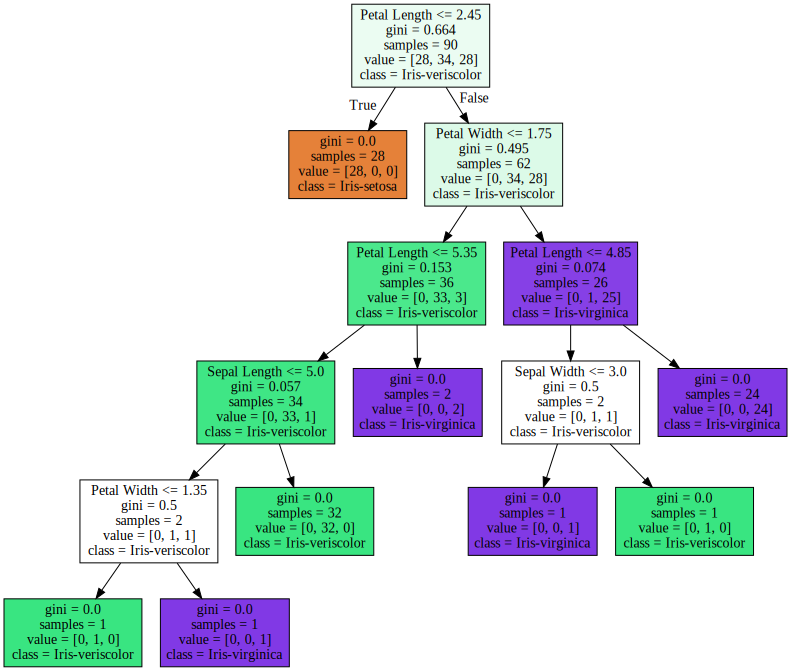

In [90]:
import graphviz
dot_data = tree.export_graphviz(dtree, feature_names=['Sepal Length','Sepal Width','Petal Length','Petal Width'], class_names=['Iris-setosa','Iris-veriscolor','Iris-virginica'], out_file=None, filled=True)
graph = graphviz.Source(dot_data)
graph

## Classification Report

In [91]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.89      1.00      0.94        16
 Iris-virginica       1.00      0.91      0.95        22

    avg / total       0.97      0.97      0.97        60



# QUESTION 3(c)

## Adaboost

In [92]:
from sklearn.ensemble import AdaBoostClassifier

In [93]:
dtree_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion = "gini", max_depth = 4, min_samples_split = 2, random_state = 123),
                         algorithm="SAMME",
                         learning_rate = 0.1,
                         n_estimators=200)

In [94]:
dtree_ada.fit(x_train, y_train)
y_pred = dtree_ada.predict(x_test)
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.933333333333


## GridsearchCV for Adaboost

In [95]:
dtree_ada_gs = GridSearchCV(dtree_ada,
                   {'learning_rate': [0.1,0.2,0.3],
                    'n_estimators': [1,2,3,4]}, verbose=1)

In [96]:
dtree_ada_gs.fit(x, y)
print(dtree_ada_gs.best_score_)
print(dtree_ada_gs.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
0.966666666667
{'learning_rate': 0.1, 'n_estimators': 2}


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.2s finished


In [97]:
dtree_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion = "gini", max_depth = 6, min_samples_split = 2, random_state = 123),
                         algorithm="SAMME",
                         learning_rate = 0.1,
                         n_estimators=2)

## Classification

In [98]:
dtree_ada.fit(x_train, y_train)
y_pred = dtree_ada.predict(x_test)
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.966666666667


## Classification Report of Best Parameters

In [99]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       0.89      1.00      0.94        16
 Iris-virginica       1.00      0.91      0.95        22

    avg / total       0.97      0.97      0.97        60

